## Property Price Prediction using Linear, Ridge and Lasso Regression

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation


### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [329]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [330]:
# reading the dataset
housing = pd.read_csv("train.csv")

In [331]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [332]:
housing.shape

(1460, 81)

###### The dataset has 1460 rows and 81 columns

In [333]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [334]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Understanding the Data Dictionary and treating missing values

The data dictionary contains the meaning of various attributes; some non-obvious ones are:

In [335]:
#check missing percentage
percent_missing = (housing.isnull().sum() / housing.isnull().count()*100).sort_values(ascending = False)
percent_missing[percent_missing > 0]

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [336]:
# Dropping Columns with high missing values ,above 40% as they do not contribute much to the model building

housing.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [337]:
housing.shape

(1460, 76)

In [338]:
# Separating numeric and categorical variables in order to impute missing values accordingly
# Found out that below columns have continuous values
numeric_list = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                           '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','TotRmsAbvGrd','Fireplaces','GarageCars',
                           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
                           'MiscVal','SalePrice']
numeric_columns = housing[numeric_list]
# All the other columns have categorical values
categorical_columns = housing.columns.difference(numeric_columns.columns)
# List of categorical values 
categorical_list = ['BedroomAbvGr', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual',
       'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond',
       'ExterQual', 'Exterior1st', 'Exterior2nd', 'Foundation', 'FullBath',
       'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id',
       'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSSubClass', 'MSZoning', 'MasVnrType', 'MoSold',
       'Neighborhood', 'OverallCond', 'OverallQual', 'PavedDrive', 'RoofMatl',
       'RoofStyle', 'SaleCondition', 'SaleType', 'Street',
       'Utilities', 'YearBuilt', 'YearRemodAdd', 'YrSold']

In [339]:
# function to impute missing values for numeric columns with median
for i in numeric_list:
    housing[i] = housing[i].fillna(housing[i].median())

In [340]:
# All missing values are replaced with the median
housing[numeric_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   MasVnrArea     1460 non-null   float64
 3   BsmtFinSF1     1460 non-null   int64  
 4   BsmtFinSF2     1460 non-null   int64  
 5   BsmtUnfSF      1460 non-null   int64  
 6   TotalBsmtSF    1460 non-null   int64  
 7   1stFlrSF       1460 non-null   int64  
 8   2ndFlrSF       1460 non-null   int64  
 9   LowQualFinSF   1460 non-null   int64  
 10  GrLivArea      1460 non-null   int64  
 11  TotRmsAbvGrd   1460 non-null   int64  
 12  Fireplaces     1460 non-null   int64  
 13  GarageCars     1460 non-null   int64  
 14  GarageArea     1460 non-null   int64  
 15  WoodDeckSF     1460 non-null   int64  
 16  OpenPorchSF    1460 non-null   int64  
 17  EnclosedPorch  1460 non-null   int64  
 18  3SsnPorc

In [341]:
housing[categorical_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedroomAbvGr   1460 non-null   int64  
 1   BldgType       1460 non-null   object 
 2   BsmtCond       1423 non-null   object 
 3   BsmtExposure   1422 non-null   object 
 4   BsmtFinType1   1423 non-null   object 
 5   BsmtFinType2   1422 non-null   object 
 6   BsmtFullBath   1460 non-null   int64  
 7   BsmtHalfBath   1460 non-null   int64  
 8   BsmtQual       1423 non-null   object 
 9   CentralAir     1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  Electrical     1459 non-null   object 
 13  ExterCond      1460 non-null   object 
 14  ExterQual      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  Foundation     1460 non-null   object 
 18  FullBath

In [342]:
# Replacing NA in below columns with 'No garage'

housing['GarageType'] = housing['GarageType'].replace(np.nan, 'No Garage')
housing['GarageFinish'] = housing['GarageFinish'].replace(np.nan, 'No Garage')
housing['GarageCond'] = housing['GarageCond'].replace(np.nan, 'No Garage')
housing['GarageQual'] = housing['GarageQual'].replace(np.nan, 'No Garage')
housing['GarageYrBlt'] = housing['GarageYrBlt'].replace(np.nan, 'No Garage')

In [343]:
# Replacing NA in below columns with 'No Basement'

housing['BsmtExposure'] = housing['BsmtExposure'].replace(np.nan, 'No Basement')
housing['BsmtFinType1'] = housing['BsmtFinType1'].replace(np.nan, 'No Basement')
housing['BsmtFinType2'] = housing['BsmtFinType2'].replace(np.nan, 'No Basement')
housing['BsmtQual'] = housing['BsmtQual'].replace(np.nan, 'No Basement')
housing['BsmtCond'] = housing['BsmtCond'].replace(np.nan, 'No Basement')

In [344]:
housing[categorical_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   BedroomAbvGr   1460 non-null   int64 
 1   BldgType       1460 non-null   object
 2   BsmtCond       1460 non-null   object
 3   BsmtExposure   1460 non-null   object
 4   BsmtFinType1   1460 non-null   object
 5   BsmtFinType2   1460 non-null   object
 6   BsmtFullBath   1460 non-null   int64 
 7   BsmtHalfBath   1460 non-null   int64 
 8   BsmtQual       1460 non-null   object
 9   CentralAir     1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  Electrical     1459 non-null   object
 13  ExterCond      1460 non-null   object
 14  ExterQual      1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  Foundation     1460 non-null   object
 18  FullBath       1460 non-null

In [345]:
# function to impute missing values for categorical columns with mode
for i in categorical_list:
    housing[i] = housing[i].fillna(housing[i].mode())

In [346]:
# Reading mode values of below columns
print(housing['Electrical'].mode())
print(housing['MasVnrType'].mode())

0    SBrkr
dtype: object
0    None
dtype: object


In [347]:
#Replacing with mode values
housing['MasVnrType'] = housing['MasVnrType'].replace(np.nan, 'None')
housing['Electrical'] = housing['Electrical'].replace(np.nan, 'SBrkr')

In [348]:
# All missing values are replaced with the mode
housing[categorical_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   BedroomAbvGr   1460 non-null   int64 
 1   BldgType       1460 non-null   object
 2   BsmtCond       1460 non-null   object
 3   BsmtExposure   1460 non-null   object
 4   BsmtFinType1   1460 non-null   object
 5   BsmtFinType2   1460 non-null   object
 6   BsmtFullBath   1460 non-null   int64 
 7   BsmtHalfBath   1460 non-null   int64 
 8   BsmtQual       1460 non-null   object
 9   CentralAir     1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  Electrical     1460 non-null   object
 13  ExterCond      1460 non-null   object
 14  ExterQual      1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  Foundation     1460 non-null   object
 18  FullBath       1460 non-null

In [349]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Exploratory data analysis

In [350]:
# percentage of missing values is 0 for all columns
percent_missing = (housing.isnull().sum() / housing.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(10)

Id              0.0
FullBath        0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
BedroomAbvGr    0.0
HalfBath        0.0
BsmtHalfBath    0.0
dtype: float64

###### Checking the distributions of below columns

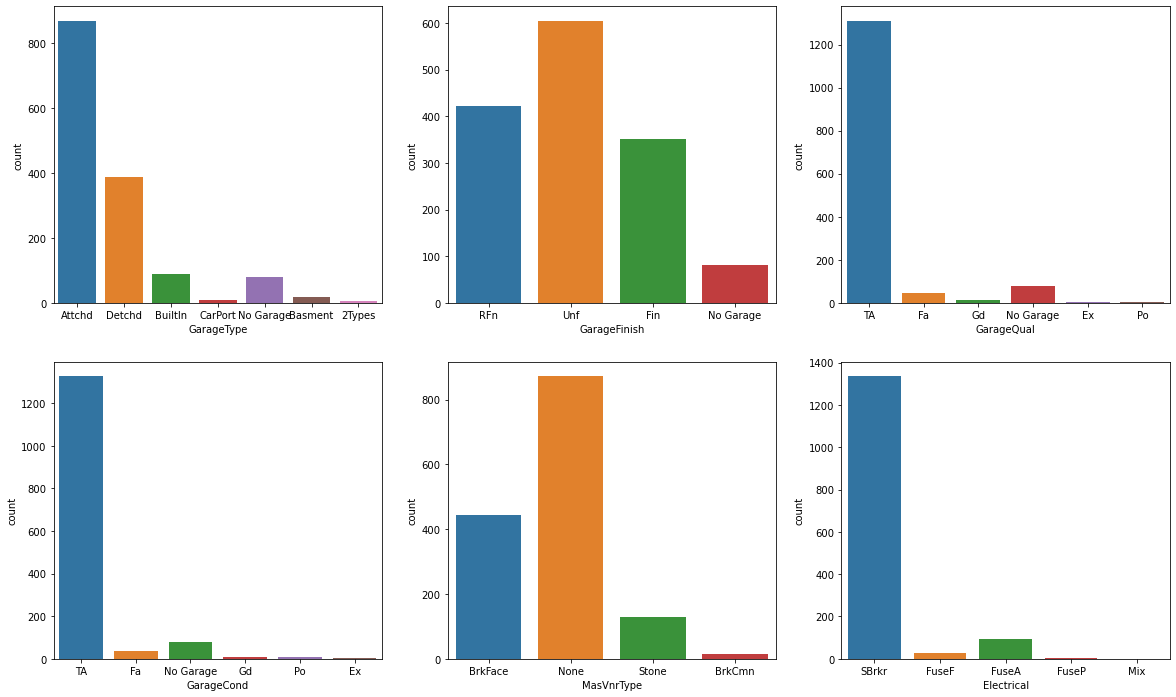

In [351]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageType',  data = housing)
plt.subplot(2,3,2)
sns.countplot(x = 'GarageFinish', data = housing)
plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = housing)
plt.subplot(2,3,4)
sns.countplot(x = 'GarageCond', data = housing)
plt.subplot(2,3,5)
sns.countplot(x = 'MasVnrType', data = housing)
plt.subplot(2,3,6)
sns.countplot(x = 'Electrical', data = housing)
plt.show()

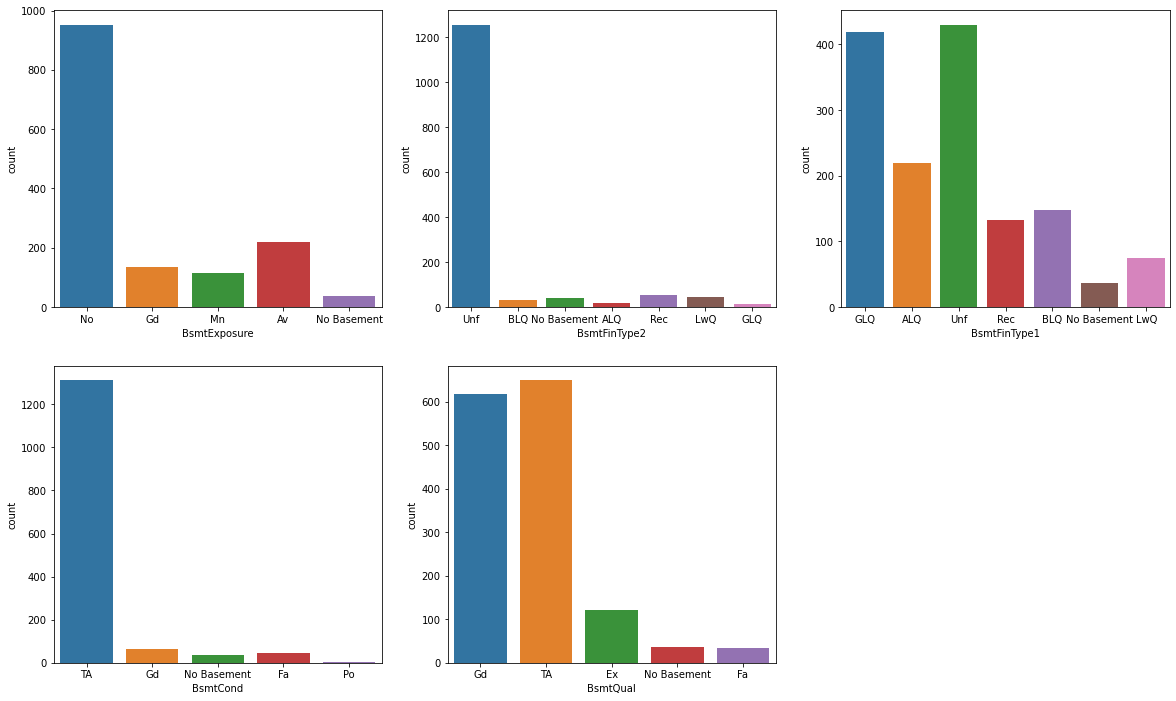

In [352]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'BsmtExposure', data = housing)
plt.subplot(2,3,2)
sns.countplot(x = 'BsmtFinType2',  data = housing)
plt.subplot(2,3,3)
sns.countplot(x = 'BsmtFinType1', data = housing)
plt.subplot(2,3,4)
sns.countplot(x = 'BsmtCond', data = housing)
plt.subplot(2,3,5)
sns.countplot(x = 'BsmtQual',  data = housing)
plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

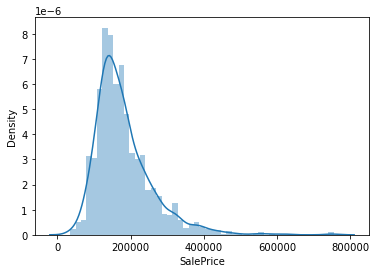

In [353]:
sns.distplot(housing['SalePrice'])

###### The distribution of target variable is almost normal

In [354]:
housing_dummies = pd.get_dummies(housing[categorical_list], drop_first = True)
housing_dummies

,BedroomAbvGr,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,Id,KitchenAbvGr,MSSubClass,MoSold,OverallCond,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
0,3,1,0,2,1,1,1,60,2,5,...,0,0,0,0,0,0,0,1,1,0
1,3,0,1,2,0,2,1,20,5,8,...,0,0,0,0,0,0,0,1,1,0
2,3,1,0,2,1,3,1,60,9,5,...,0,0,0,0,0,0,0,1,1,0
3,3,1,0,1,0,4,1,70,2,5,...,0,0,0,0,0,0,0,1,1,0
4,4,1,0,2,1,5,1,60,12,5,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,0,0,2,1,1456,1,60,8,5,...,0,0,0,0,0,0,0,1,1,0
1456,3,1,0,2,0,1457,1,20,2,6,...,0,0,0,0,0,0,0,1,1,0
1457,4,0,0,2,0,1458,1,70,5,9,...,0,0,0,0,0,0,0,1,1,0
1458,2,1,0,1,0,1459,1,20,4,6,...,0,0,0,0,0,0,0,1,1,0


In [355]:
housing = pd.concat([housing, housing_dummies], axis=1)

In [356]:
housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,1,1,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,0,1,1,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,1,1,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,0,0,1,1,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,1,1,0
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,1,1,0
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,1,1,0
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,1,1,0


In [357]:
housing.drop(categorical_list,axis=1,inplace=True)

In [358]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale
scaled_columns = pd.DataFrame(scale(housing))

In [359]:
# split into X and y
X = housing.loc[:, housing.columns != 'SalePrice']

y = housing['SalePrice'] 

### Splitting into train and test data

In [360]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### Recursive feature elimination


In [361]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

### Applying linear regression

In [362]:
# Running RFE with the output number of the variable equal to 50
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [363]:
# Using only RFE supported columns
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_test_rfe = X_test[X_test.columns[rfe.support_]]

In [364]:
# fitting the training data on linear regression and predicting values
lm = LinearRegression()
lm.fit(X_train_rfe, y_train)
y_train_pred = lm.predict(X_train_rfe)
r2_score(y_train, y_train_pred)

0.8443687246326183

In [365]:
# fitting the test data on linear regression and predicting values
y_test_pred = lm.predict(X_test_rfe)
r2_score(y_test, y_test_pred)

-112638927.41957362

###### Huge difference in R squared values of train and test data

### Verifying the assumptions of linear regression

<AxesSubplot:ylabel='SalePrice'>

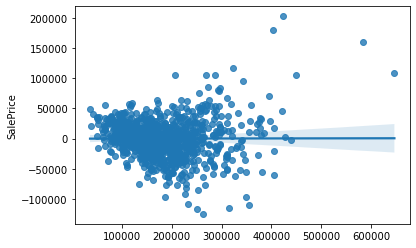

In [366]:
# checking residual plot
res = (y_train - y_train_pred)
sns.regplot(y_train_pred,res)

<AxesSubplot:xlabel='SalePrice'>

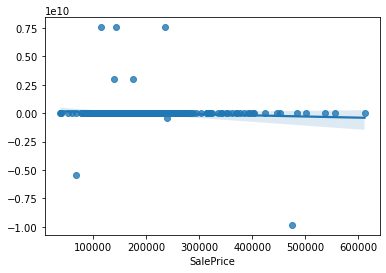

In [367]:
# Check for homoscedacity
fig = plt.figure()
sns.regplot(y_test, y_test_pred)

###### Assumptions of linear regression seem to be failing

### Ridge Regression

In [368]:
#fitting ridge model with alpha=0.01
ridge_1 = Ridge(alpha=0.1)
ridge_1.fit(X_train_rfe,y_train)

# R-squared value on training data
y_train_pred = ridge_1.predict(X_train_rfe)
print(r2_score(y_train,y_train_pred))

# R-squared value on testing data
y_test_pred  = ridge_1.predict(X_test_rfe)
print(r2_score(y_test,y_test_pred))

#printing coeff of all columns
list(zip(X_train_rfe.columns,ridge_1.coef_))

0.82405982517949
0.7445134684452315


[('BsmtFinSF1', 27.964065663775187),
 ('BsmtFinSF2', 5.4600810018126),
 ('BsmtUnfSF', 5.4523890143603575),
 ('TotalBsmtSF', 38.87651317748608),
 ('1stFlrSF', 35.07736593490494),
 ('2ndFlrSF', 49.684187933845166),
 ('LowQualFinSF', -59.112977463430305),
 ('GrLivArea', 25.6483641055525),
 ('BsmtCond_No Basement', 5154.911905882128),
 ('BsmtFinType1_No Basement', 5154.911905881788),
 ('BsmtQual_No Basement', 5154.9119058829565),
 ('Condition2_PosN', -402655.9772167622),
 ('Condition2_RRNn', 26056.431808642275),
 ('Electrical_Mix', 0.0),
 ('ExterCond_Fa', -46691.22429173108),
 ('ExterCond_Gd', -41244.87770786588),
 ('ExterCond_TA', -37990.60929482409),
 ('Exterior1st_AsphShn', -2191.5926680686216),
 ('Exterior1st_CBlock', -18776.43731928827),
 ('Exterior2nd_AsphShn', -2191.592668068591),
 ('Exterior2nd_CBlock', -18776.437319288354),
 ('Functional_Sev', -75716.64466713397),
 ('GarageCond_Fa', -9289.808286112497),
 ('GarageCond_Gd', -8452.161160160873),
 ('GarageCond_No Garage', -6111.597351

In [369]:
# building ridge model for a range of alpha values to get the best alpha
alpha_values = {'alpha': [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,
                          11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,50.0]}
ridge_2 = Ridge()
ridge_model = GridSearchCV(estimator = ridge_2, param_grid = alpha_values, scoring= 'neg_mean_absolute_error', cv = 5, 
                           return_train_score=True, verbose = 1)            
ridge_model.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 31 candidates, totalling 155 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                                   9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0,
                                   16.0, 17.0, 18.0, 19.0, 20.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [370]:
# checking above result by sorting with rank
ridge_result = pd.DataFrame(ridge_model.cv_results_)
ridge_result.sort_values(by = ['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
2,0.005749,0.000651,0.003108,0.000507,0.2,{'alpha': 0.2},-22982.534564,-28277.253836,-25741.233406,-25971.260124,...,-25519.674074,1737.402476,1,-23793.663903,-22377.960803,-23279.674103,-23220.605122,-23630.603573,-23260.501501,490.321340
3,0.005237,0.000768,0.003086,0.000632,0.3,{'alpha': 0.3},-23055.490686,-28282.779289,-25772.538680,-25813.771888,...,-25544.025247,1695.805487,2,-24099.027162,-22426.054637,-23483.132279,-23516.069999,-23930.485217,-23490.953859,582.690880
1,0.004898,0.000213,0.003406,0.000457,0.1,{'alpha': 0.1},-22920.058268,-28284.586041,-25736.801106,-26511.768509,...,-25546.578051,1842.178673,3,-23325.663989,-22320.627349,-22935.651450,-22763.583014,-23188.305224,-22906.766205,352.032417
4,0.005811,0.000794,0.002709,0.000422,0.4,{'alpha': 0.4},-23103.777623,-28334.614517,-25807.042632,-25746.930416,...,-25576.477203,1689.674627,4,-24315.272409,-22466.335708,-23612.412144,-23729.543857,-24142.682379,-23653.249299,647.158674
5,0.004676,0.000833,0.003009,0.000265,0.5,{'alpha': 0.5},-23140.496013,-28387.767575,-25829.635618,-25698.806060,...,-25601.029628,1691.616059,5,-24471.717061,-22501.540850,-23701.679042,-23883.497598,-24298.211933,-23771.329297,692.523489
6,0.005022,0.000636,0.002420,0.000475,0.6,{'alpha': 0.6},-23168.778789,-28433.093956,-25849.603860,-25659.963612,...,-25619.876239,1695.629475,6,-24592.661179,-22532.791200,-23765.238647,-24000.444264,-24421.158951,-23862.458848,726.890507
7,0.005737,0.000404,0.003396,0.001038,0.7,{'alpha': 0.7},-23187.678151,-28471.957732,-25876.214304,-25624.077513,...,-25634.316280,1702.032627,7,-24689.062041,-22561.070670,-23813.419247,-24093.412836,-24518.930231,-23935.179005,753.278465
8,0.005606,0.000443,0.002503,0.000773,0.8,{'alpha': 0.8},-23201.480900,-28505.453206,-25899.071719,-25590.222034,...,-25645.820937,1708.521150,8,-24771.717022,-22587.451797,-23851.579329,-24169.130127,-24599.442450,-23995.864145,774.689487
9,0.005137,0.000279,0.002940,0.000523,0.9,{'alpha': 0.9},-23216.935929,-28534.671029,-25918.877967,-25556.687688,...,-25655.501978,1713.567874,9,-24844.440537,-22611.425693,-23883.506036,-24234.853062,-24669.507530,-24048.746572,793.259658
10,0.005326,0.000756,0.003063,0.000720,1.0,{'alpha': 1.0},-23230.926704,-28560.420928,-25936.424148,-25523.551947,...,-25667.481143,1716.797546,10,-24908.153551,-22633.358338,-23912.905125,-24292.433463,-24730.155201,-24095.401135,809.095160


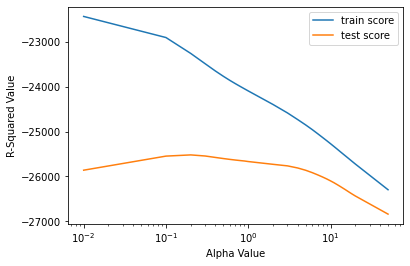

In [371]:
# visualizing the result to compare the trends of R-squared values of train and test data
plt.plot(ridge_result['param_alpha'], ridge_result['mean_train_score'])
plt.plot(ridge_result['param_alpha'], ridge_result['mean_test_score'])
plt.xscale('log')
plt.ylabel('R-Squared Value')
plt.xlabel('Alpha Value')
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [372]:
# Finding the best alpha value
ridge_model.best_estimator_

Ridge(alpha=0.2)

### The best alpha value is 0.2

In [373]:
# Fitting train data to ridge model with the best alpha value and checking the coefficients
ridge_best = Ridge(alpha=0.2)
ridge_best.fit(X_train_rfe, y_train)
print("Intercept: ", ridge_best.intercept_)
list(zip(X_train_rfe.columns,ridge_best.coef_))

Intercept:  -142945.96546534897


[('BsmtFinSF1', 24.656191279876964),
 ('BsmtFinSF2', 5.179601231131844),
 ('BsmtUnfSF', 4.488659294743273),
 ('TotalBsmtSF', 34.32442780143403),
 ('1stFlrSF', 37.51043705547705),
 ('2ndFlrSF', 48.03214978892921),
 ('LowQualFinSF', -60.382977894901266),
 ('GrLivArea', 25.159477215438937),
 ('BsmtCond_No Basement', 2938.405712576652),
 ('BsmtFinType1_No Basement', 2938.405712576765),
 ('BsmtQual_No Basement', 2938.405712577925),
 ('Condition2_PosN', -356931.92707182607),
 ('Condition2_RRNn', 22504.27503859562),
 ('Electrical_Mix', 0.0),
 ('ExterCond_Fa', -41242.72685856375),
 ('ExterCond_Gd', -35710.61743167262),
 ('ExterCond_TA', -32015.86434435215),
 ('Exterior1st_AsphShn', -2621.058862994408),
 ('Exterior1st_CBlock', -18020.775024631097),
 ('Exterior2nd_AsphShn', -2621.058862994327),
 ('Exterior2nd_CBlock', -18020.775024631006),
 ('Functional_Sev', -66245.85619391444),
 ('GarageCond_Fa', -7752.657040615261),
 ('GarageCond_Gd', -7066.251427048874),
 ('GarageCond_No Garage', -5522.07937

In [374]:
# Generating predicted values for train and test data
y_train_pred = ridge_best.predict(X_train_rfe)
y_test_pred  = ridge_best.predict(X_test_rfe)

#### Metrics of Ridge regression model

In [375]:
#R-Squared values for Ridge Regression Model
r_squared_train = r2_score(y_train, y_train_pred)
r_squared_test = r2_score(y_test, y_test_pred)
print(r_squared_train)
print(r_squared_test)

0.807433496349677
0.7524317919267955


In [376]:
#mean squared error (MSE) for Ridge Regression Model
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
print(MSE_train)
print(MSE_test)

1203436688.2087295
1593204589.5258374


In [377]:
#Root Mean Squared Error for Train and Test data
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)
print(RMSE_train)
print(RMSE_test)

34690.58500816511
39914.96698640545


### Validating the assumptions of Ridge Regression

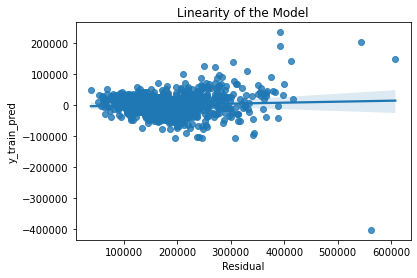

In [378]:
#Linearity of the model
res = (y_train - y_train_pred)
sns.regplot(y_train_pred,res)
plt.title("Linearity of the Model")
plt.ylabel("y_train_pred")
plt.xlabel("Residual")
plt.show()

Text(0, 0.5, 'y_pred')

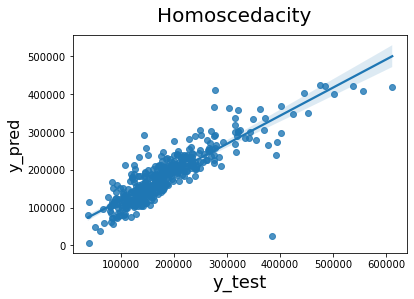

In [379]:
#Homoscedacity
fig = plt.figure()
sns.regplot(y_test, y_test_pred)
fig.suptitle('Homoscedacity', fontsize = 20)               
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

Text(0, 0.5, 'Error Terms')

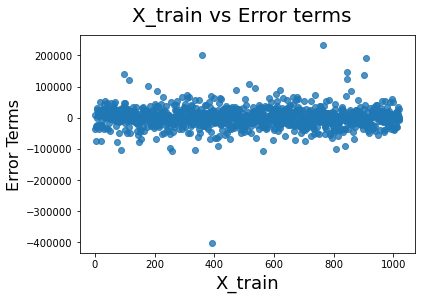

In [380]:
#Independence of Error terms 
fig = plt.figure()
#changing to 1D
temp = [i for i in range(0,len(X_train_rfe),1)]
sns.regplot(temp, res)
fig.suptitle('X_train vs Error terms', fontsize = 20)
plt.xlabel('X_train', fontsize = 18)
plt.ylabel('Error Terms', fontsize = 16)

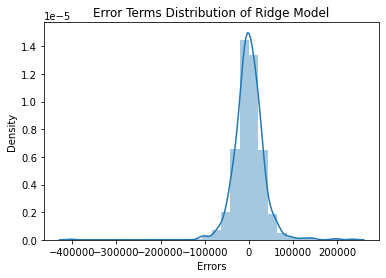

In [381]:
# Normality of error terms
res = (y_train - y_train_pred)
sns.distplot(res , bins = 30)
plt.title('Error Terms Distribution of Ridge Model')               
plt.xlabel('Errors') 
plt.show()

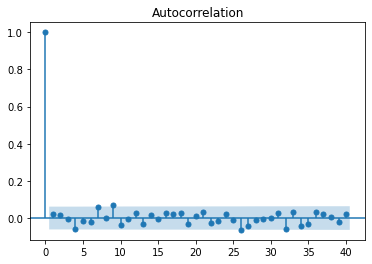

In [382]:
#Multicollinearity
import statsmodels.tsa.api as smt
autocor = smt.graphics.plot_acf(res, lags=40 , alpha=0.05)
autocor.show()

###### As per the results above, all the assumptions seem to be holding well

### Finding the top features

In [383]:
ridge_df = pd.DataFrame({'Features':X_train_rfe.columns, 'Coefficient':ridge_best.coef_.round(4), 
                         'Absolute value':abs(ridge_best.coef_.round(4))})
#Sorting coefficients in descending order of absolute values
ridge_df = ridge_df.sort_values(by='Absolute value', ascending=False)
# Resetting index
ridge_df.reset_index(drop=True, inplace=True)  
ridge_df.head(10)

,Features,Coefficient,Absolute value
0,RoofMatl_WdShngl,375159.2169,375159.2169
1,Condition2_PosN,-356931.9271,356931.9271
2,RoofMatl_Membran,309232.4770,309232.4770
3,RoofMatl_CompShg,287936.8583,287936.8583
4,RoofMatl_Tar&Grv,283555.5007,283555.5007
5,RoofMatl_Metal,280670.6906,280670.6906
6,RoofMatl_WdShake,274654.4652,274654.4652
7,RoofMatl_Roll,204207.0281,204207.0281
8,KitchenQual_Fa,-99229.3922,99229.3922
9,KitchenQual_TA,-92696.2566,92696.2566


### Lasso Regression

In [384]:
# Fitting train data to Lasso regression with initial alpha value of 0.001
lasso_1 = Lasso(alpha=0.0001)
lasso_1.fit(X_train,y_train)

# R-squared value on train data
y_train_pred = lasso_1.predict(X_train)
print(r2_score(y_train,y_train_pred))

# R-squared value on test data
y_test_pred  = lasso_1.predict(X_test)
print(r2_score(y_test,y_test_pred))
print(len(lasso_1.coef_))
#printing coefficients of all columns
list(zip(X_train.columns,lasso_1.coef_))

0.9490759474505341
0.7959085048722885
324


[('LotFrontage', 117.5563551151388),
 ('LotArea', 0.6765187342417747),
 ('MasVnrArea', 16.674615006156902),
 ('BsmtFinSF1', 37.06307638991068),
 ('BsmtFinSF2', 16.397455694629922),
 ('BsmtUnfSF', 17.722079319849414),
 ('TotalBsmtSF', 9.885504411407812),
 ('1stFlrSF', 54.844679701132605),
 ('2ndFlrSF', 78.18891734237434),
 ('LowQualFinSF', 20.477814694374704),
 ('GrLivArea', 9.33901493661828),
 ('TotRmsAbvGrd', -2156.465104972527),
 ('Fireplaces', -318.0939633329433),
 ('GarageCars', 2700.0532128826),
 ('GarageArea', 10.977450047589775),
 ('WoodDeckSF', 8.654429985693584),
 ('OpenPorchSF', 27.304343567090825),
 ('EnclosedPorch', -31.105295665888057),
 ('3SsnPorch', 33.531784003700366),
 ('ScreenPorch', 13.387998945420911),
 ('PoolArea', 108.36588526346974),
 ('MiscVal', 2.0550447560596297),
 ('BldgType_2fmCon', -25453.690336241823),
 ('BldgType_Duplex', -30784.963158877963),
 ('BldgType_Twnhs', -12801.275170208166),
 ('BldgType_TwnhsE', -11255.924950163851),
 ('BsmtCond_Gd', 1243.527034

In [385]:
# building lasso model for a range of alpha values to get the best alpha
alpha_values = {'alpha': [0.0001,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,
                          11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,50.0,100.0,500.0,1000.0 ]}
lasso_2 = Lasso()
lasso_model = GridSearchCV(estimator = lasso_2, param_grid = alpha_values, scoring= 'neg_mean_absolute_error', cv = 5, 
                        return_train_score=True, verbose = 1)            
lasso_model.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0,
                                   14.0, 15.0, 16.0, 17.0, 18.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [386]:
# checking above result by sorting with rank
lasso_result = pd.DataFrame(lasso_model.cv_results_)
lasso_result.sort_values(by = ['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
32,0.011594,0.004211,0.003537,0.000405,50.0,{'alpha': 50.0},-22782.772658,-28546.322017,-25736.625466,-26866.333265,...,-25626.643745,2009.628761,1,-23694.875485,-22714.123815,-23022.680764,-22950.000526,-23560.347908,-23188.405700,375.259307
31,0.017385,0.004985,0.003064,0.000623,20.0,{'alpha': 20.0},-22745.595296,-28249.873721,-25881.610559,-27998.199753,...,-25712.849666,2217.588228,2,-23000.389921,-22485.200457,-22594.454576,-22365.810824,-22821.096102,-22653.390376,229.345665
30,0.018601,0.003545,0.003292,0.000504,19.0,{'alpha': 19.0},-22757.862338,-28231.763691,-25887.917117,-28042.766176,...,-25719.782542,2221.438954,3,-22980.916979,-22473.691073,-22584.505635,-22351.667926,-22800.422681,-22638.240859,226.193731
29,0.019695,0.003825,0.003216,0.000682,18.0,{'alpha': 18.0},-22770.990899,-28213.653192,-25894.225753,-28087.188104,...,-25727.026929,2225.081327,4,-22962.208058,-22462.205800,-22575.667150,-22336.789701,-22780.595432,-22623.493228,223.565972
28,0.020032,0.003604,0.003939,0.001087,17.0,{'alpha': 17.0},-22784.119512,-28195.544047,-25900.533836,-28131.593888,...,-25734.268263,2228.924686,5,-22943.736448,-22450.761821,-22567.083679,-22322.308211,-22761.398515,-22609.057735,221.025909
27,0.019361,0.004397,0.003117,0.000665,16.0,{'alpha': 16.0},-22797.248080,-28177.432206,-25906.844039,-28176.007949,...,-25741.511134,2232.972327,6,-22925.394809,-22439.317196,-22558.502533,-22308.605440,-22742.201568,-22594.804309,218.366611
26,0.019567,0.004735,0.003419,0.000476,15.0,{'alpha': 15.0},-22810.797030,-28159.321089,-25913.151110,-28220.515007,...,-25749.184086,2236.823256,7,-22907.093660,-22427.872745,-22550.579525,-22295.973329,-22723.005000,-22580.904852,215.460444
25,0.018975,0.004491,0.003249,0.000834,14.0,{'alpha': 14.0},-22825.447011,-28141.211393,-25919.457039,-28265.256307,...,-25757.272686,2240.496723,8,-22888.792475,-22416.514546,-22543.662389,-22283.341214,-22704.126985,-22567.287521,212.606028
24,0.017891,0.004490,0.003691,0.000403,13.0,{'alpha': 13.0},-22840.096996,-28123.099953,-25925.205495,-28310.570214,...,-25765.427658,2244.430738,9,-22870.792570,-22405.372815,-22536.615752,-22270.730222,-22685.456176,-22553.793507,209.891431
23,0.018890,0.003858,0.003057,0.000591,12.0,{'alpha': 12.0},-22855.396688,-28109.871606,-25930.280464,-28348.024185,...,-25773.338201,2247.258617,10,-22852.827557,-22394.230823,-22532.148768,-22256.006784,-22666.751524,-22540.393091,207.792540


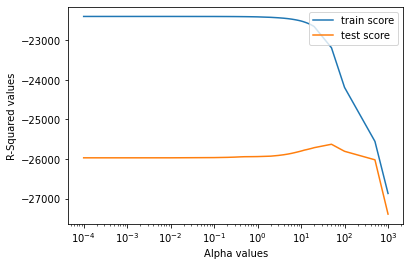

In [387]:
# visualizing the result to compare the trends of R-squared values of train and test data
plt.plot(lasso_result['param_alpha'], lasso_result['mean_train_score'])
plt.plot(lasso_result['param_alpha'], lasso_result['mean_test_score'])
plt.xscale('log')
plt.ylabel('R-Squared values')
plt.xlabel('Alpha values')
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [388]:
lasso_model.best_estimator_

Lasso(alpha=50.0)

### The best value for alpha is 50.0

In [389]:
# Fitting train data to ridge model with the best alpha value
lasso_best = Lasso(alpha=50)
        
lasso_best.fit(X_train, y_train) 
print("Intercept: ",lasso_best.intercept_)

Intercept:  38645.099560896924


In [390]:
# Generating predicted values for train and test data
y_train_pred = lasso_best.predict(X_train)
y_test_pred  = lasso_best.predict(X_test)

#### Metrics of Lasso regression model

In [391]:
#R-Squared values for Lasso Regression Model
r_squared_train = r2_score(y_true= y_train, y_pred= y_train_pred)
r_squared_test = r2_score(y_true= y_test, y_pred= y_test_pred)
print(r_squared_train)
print(r_squared_test)

0.9061913610639643
0.8330655009172548


In [392]:
#Check the mean squared error (MSE) for Lasso Regression Model
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
print(MSE_train)
print(MSE_test)

586253349.5002358
1074293069.2061365


In [393]:
#Root Mean Squared Error for Train and Test Sets
RMSE_train = np.sqrt(MSE_lasso_train)
RMSE_test = np.sqrt(MSE_lasso_test)
print(RMSE_train)
print(RMSE_test)

24212.66919404459
32776.41025503154


### Validating the assumptions of Lasso Regression

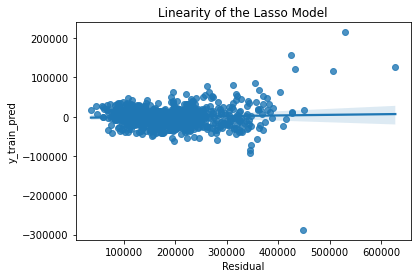

In [394]:
#Linearity
res = (y_train - y_train_pred)
sns.regplot(y_train_pred,res)
plt.title("Linearity of the Lasso Model")
plt.ylabel("y_train_pred")
plt.xlabel("Residual")
plt.show()

Text(0, 0.5, 'y_pred')

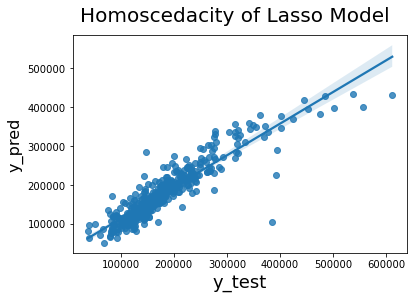

In [395]:
#Homoscedacity
fig = plt.figure()
sns.regplot(y_test, y_test_pred)
fig.suptitle('Homoscedacity of Lasso Model', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

Text(0, 0.5, 'Error Terms')

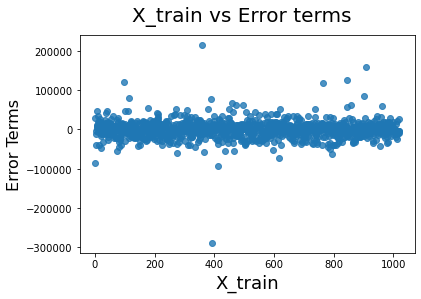

In [396]:
#Independence of Error terms 
fig = plt.figure()
#changing to 1D
temp = [i for i in range(0,len(X_train),1)]
sns.regplot(temp, res)
fig.suptitle('X_train vs Error terms', fontsize = 20)
plt.xlabel('X_train', fontsize = 18)
plt.ylabel('Error Terms', fontsize = 16)

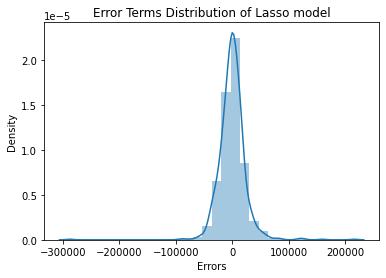

In [397]:
# Normality of error terms
res = (y_train - y_train_pred)    
sns.distplot(res , bins = 30)
plt.title('Error Terms Distribution of Lasso model')               
plt.xlabel('Errors') 
plt.show()

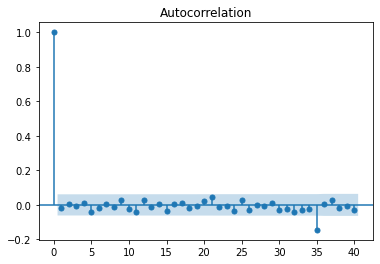

In [398]:
#Multicollinearity
import statsmodels.tsa.api as smt
autocor = smt.graphics.plot_acf(res, lags=40 , alpha=0.05)
autocor.show()

###### As per the results above, all the assumptions seem to be holding well

In [399]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso_best.coef_.round(4), 
                         'Absolute value':abs(lasso_best.coef_.round(4))})
#Sorting coefficient in descending order of absolute values
lasso_df = lasso_df.sort_values(by='Absolute value', ascending=False)
#Resetting index
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.head(10)

,Features,Coefficient,Absolute value
0,Condition2_PosN,-262359.6261,262359.6261
1,RoofMatl_WdShngl,97550.4592,97550.4592
2,Neighborhood_NoRidge,42756.5136,42756.5136
3,KitchenQual_TA,-36929.2168,36929.2168
4,Neighborhood_NridgHt,35100.2620,35100.2620
5,RoofMatl_CompShg,32614.6965,32614.6965
6,KitchenQual_Gd,-32290.1182,32290.1182
7,BsmtQual_TA,-30104.8736,30104.8736
8,KitchenQual_Fa,-29890.2227,29890.2227
9,BsmtQual_Gd,-29278.7111,29278.7111


# Assignment Part 2

###### Question 1:

###### Doubling alpha value of Ridge model and generating metrics

In [400]:
#Checking the coefficient values with lambda (alpha) = 0.4
ridge = Ridge(alpha=0.4)
ridge.fit(X_train_rfe, y_train)
# predicting training set
y_train_pred = ridge.predict(X_train_rfe)
#predicting test set
y_test_pred  = ridge.predict(X_test_rfe)
#R-Squared values
r_squared_train = r2_score(y_train, y_train_pred)
r_squared_test = r2_score(y_test, y_test_pred)
#mean squared error (MSE)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
##Root Mean Squared Error for Train and Test Sets
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)

print("Train Data:\nR_Squared:",r_squared_train,"\nMSE score:",MSE_train,"\nRMSE score:",RMSE_train,"\n")
print("Test Data:\nR_Squared:",r_squared_test,"\nMSE score:",MSE_test,"\nRMSE score:",RMSE_test,"\n")

Train Data:
R_Squared: 0.7893817399042196 
MSE score: 1316250420.5103774 
RMSE score: 36280.16566266446 

Test Data:
R_Squared: 0.7622608024624556 
MSE score: 1529950810.6267262 
RMSE score: 39114.58565070997 



In [401]:
# Fitting train data to ridge model with the best alpha value and checking the coefficients
ridge_best = Ridge(alpha=0.4)
ridge_best.fit(X_train_rfe, y_train)
print("Intercept: ", ridge_best.intercept_)
list(zip(X_train_rfe.columns,ridge_best.coef_))

Intercept:  -38861.08535908902


[('BsmtFinSF1', 21.94676653230707),
 ('BsmtFinSF2', 4.9465004843042015),
 ('BsmtUnfSF', 3.7638122561941962),
 ('TotalBsmtSF', 30.657078598316705),
 ('1stFlrSF', 39.46005095711326),
 ('2ndFlrSF', 46.62358926825039),
 ('LowQualFinSF', -61.48420951594053),
 ('GrLivArea', 24.599373454619272),
 ('BsmtCond_No Basement', 1147.2464494415442),
 ('BsmtFinType1_No Basement', 1147.2464494414287),
 ('BsmtQual_No Basement', 1147.2464494416051),
 ('Condition2_PosN', -296464.284635892),
 ('Condition2_RRNn', 18290.92906347501),
 ('Electrical_Mix', 0.0),
 ('ExterCond_Fa', -33975.980710144104),
 ('ExterCond_Gd', -28487.19878245729),
 ('ExterCond_TA', -24385.858347310772),
 ('Exterior1st_AsphShn', -2744.8184510722467),
 ('Exterior1st_CBlock', -16591.814063909907),
 ('Exterior2nd_AsphShn', -2744.8184510722263),
 ('Exterior2nd_CBlock', -16591.81406390986),
 ('Functional_Sev', -53984.68785193579),
 ('GarageCond_Fa', -6199.7381822578855),
 ('GarageCond_Gd', -5041.189238819239),
 ('GarageCond_No Garage', -4768

In [402]:
ridge_df = pd.DataFrame({'Features':X_train_rfe.columns, 'Coefficient':ridge_best.coef_.round(4), 
                         'Absolute value':abs(ridge_best.coef_.round(4))})
#Sorting coefficients in descending order of absolute values
ridge_df = ridge_df.sort_values(by='Absolute value', ascending=False)
# Resetting index
ridge_df.reset_index(drop=True, inplace=True)  
ridge_df.head(10)

,Features,Coefficient,Absolute value
0,Condition2_PosN,-296464.2846,296464.2846
1,RoofMatl_WdShngl,260277.0957,260277.0957
2,RoofMatl_Membran,185633.0530,185633.0530
3,RoofMatl_CompShg,176950.7627,176950.7627
4,RoofMatl_Tar&Grv,169003.5589,169003.5589
5,RoofMatl_Metal,161504.0219,161504.0219
6,RoofMatl_WdShake,160764.2032,160764.2032
7,KitchenQual_Fa,-99276.0196,99276.0196
8,RoofMatl_Roll,96738.5151,96738.5151
9,KitchenQual_TA,-93309.6591,93309.6591


###### Doubling alpha value of Lasso model and generating metrics

In [403]:
#Checking the coefficient values with lambda (alpha) = 100
lasso = Lasso(alpha=100)
lasso.fit(X_train,y_train)

# R-squared value on train data
y_train_pred = lasso.predict(X_train)
print(r2_score(y_train,y_train_pred))

# R-squared value on test data
y_test_pred  = lasso.predict(X_test)
print(r2_score(y_test,y_test_pred))
print(len(lasso.coef_))
#printing coefficients of all columns
list(zip(X_train.columns,lasso.coef_))

0.895661726469905
0.8428570157313208
324


[('LotFrontage', -157.5549164942598),
 ('LotArea', 0.43694428998442236),
 ('MasVnrArea', 16.566166655825366),
 ('BsmtFinSF1', 6.239158737301625),
 ('BsmtFinSF2', 13.9179464535139),
 ('BsmtUnfSF', 3.431431696914679),
 ('TotalBsmtSF', 2.4166557403612643),
 ('1stFlrSF', 49.81557223693121),
 ('2ndFlrSF', 68.98885272183159),
 ('LowQualFinSF', -2.134572510909868),
 ('GrLivArea', 8.265139302710486),
 ('TotRmsAbvGrd', -796.4804338188094),
 ('Fireplaces', 3154.8401515583982),
 ('GarageCars', 13922.846759226231),
 ('GarageArea', -8.542444092128308),
 ('WoodDeckSF', 13.302672011020078),
 ('OpenPorchSF', 7.0036613074004945),
 ('EnclosedPorch', -0.04034392553997492),
 ('3SsnPorch', 57.39373214893666),
 ('ScreenPorch', 27.68682884700034),
 ('PoolArea', -28.38245879177274),
 ('MiscVal', 0.3159903884510195),
 ('BldgType_2fmCon', -16223.535461609958),
 ('BldgType_Duplex', -17844.000721837892),
 ('BldgType_Twnhs', -20695.622693498088),
 ('BldgType_TwnhsE', -19105.28180446554),
 ('BsmtCond_Gd', 6773.4470

In [404]:
#R-Squared values
r_squared_train = r2_score(y_train, y_train_pred)
r_squared_test = r2_score(y_test, y_test_pred)
#mean squared error (MSE)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
##Root Mean Squared Error for Train and Test Sets
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)

print("Train Data:\nR_Squared:",r_squared_train,"\nMSE score:",MSE_train,"\nRMSE score:",RMSE_train,"\n")
print("Test Data:\nR_Squared:",r_squared_test,"\nMSE score:",MSE_test,"\nRMSE score:",RMSE_test,"\n")

Train Data:
R_Squared: 0.895661726469905 
MSE score: 652057881.1488605 
RMSE score: 25535.424044821742 

Test Data:
R_Squared: 0.8428570157313208 
MSE score: 1011280590.9013001 
RMSE score: 31800.63821531417 



In [405]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), 
                         'Absolute value':abs(lasso.coef_.round(4))})
#Sorting coefficient in descending order of absolute values
lasso_df = lasso_df.sort_values(by='Absolute value', ascending=False)
#Resetting index
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.head(10)

,Features,Coefficient,Absolute value
0,Condition2_PosN,-204416.9528,204416.9528
1,RoofMatl_WdShngl,69796.4155,69796.4155
2,Neighborhood_NoRidge,41231.5422,41231.5422
3,KitchenQual_TA,-37140.9320,37140.9320
4,Neighborhood_NridgHt,34898.3207,34898.3207
5,KitchenQual_Gd,-31560.6454,31560.6454
6,KitchenQual_Fa,-30582.1668,30582.1668
7,BsmtQual_Gd,-26981.9732,26981.9732
8,BsmtQual_TA,-26516.4237,26516.4237
9,Neighborhood_Somerst,25940.6647,25940.6647


###### Question 3:

In [406]:
top5 = lasso_df.Features[0:5]
X_train = X_train.drop(top5,axis=1)
X_test = X_test.drop(top5,axis=1)

In [407]:
#Checking the coefficient values with lambda (alpha) = 50
lasso = Lasso(alpha=50)
lasso.fit(X_train,y_train)

# R-squared value on train data
y_train_pred = lasso.predict(X_train)

# R-squared value on test data
y_test_pred  = lasso.predict(X_test)
print(len(lasso.coef_))
#printing coefficients of all columns
list(zip(X_train.columns,lasso.coef_))

#R-Squared values
r_squared_train = r2_score(y_train, y_train_pred)
r_squared_test = r2_score(y_test, y_test_pred)
#mean squared error (MSE)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
##Root Mean Squared Error for Train and Test Sets
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)

print("Train Data:\nR_Squared:",r_squared_train,"\nMSE score:",MSE_train,"\nRMSE score:",RMSE_train,"\n")
print("Test Data:\nR_Squared:",r_squared_test,"\nMSE score:",MSE_test,"\nRMSE score:",RMSE_test,"\n")

319
Train Data:
R_Squared: 0.8820891316636352 
MSE score: 736879271.3409805 
RMSE score: 27145.520281272573 

Test Data:
R_Squared: 0.8382615526491755 
MSE score: 1040854310.9296223 
RMSE score: 32262.273802843196 



In [408]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), 
                         'Absolute value':abs(lasso.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Absolute value', ascending=False)
lasso_df.reset_index(drop=True, inplace=True) 
top5 = lasso_df.Features[0:5]
print(top5)

0         Condition2_PosA
1    Neighborhood_Edwards
2    Neighborhood_Mitchel
3             BsmtQual_TA
4             BsmtQual_Gd
Name: Features, dtype: object
